## Лабораторная работа №7

### Задание 1. Проверка параметрических гипотез

In [212]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as ws

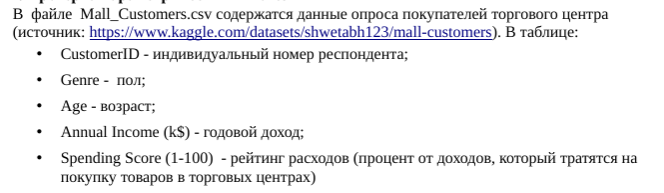

In [213]:
alpha = 0.05

df = pd.read_csv("../data/lab7/Mall_Customers.csv", sep=",")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


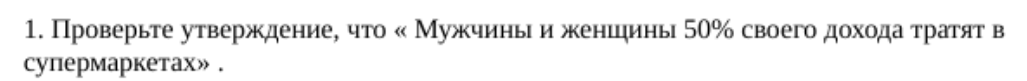
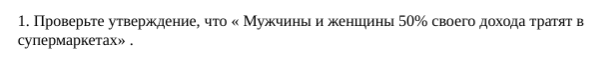

In [214]:
male_spending_score = df[df['Genre'] == 'Male']['Spending Score (1-100)']
female_spending_score = df[df['Genre'] == 'Female']['Spending Score (1-100)']

m0 = 50

male_score_n = len(male_spending_score)
female_score_n = len(female_spending_score)

male_score_mean = np.mean(male_spending_score)
female_score_mean = np.mean(female_spending_score)

male_score_std = np.std(male_spending_score, ddof=1)
female_score_std = np.std(female_spending_score, ddof=1)

# Гипотеза H0 - m = m0.
# ZТЕСТ (дисперсия неизвестна)
ztest_t_stat_m = (male_score_mean - m0) / (male_score_std / np.sqrt(male_score_n))
ztest_p_value_t_m = 2 * (1 - stats.t.cdf(abs(ztest_t_stat_m), df=male_score_n - 1))

ztest_t_stat_f = (female_score_mean - m0) / (female_score_std / np.sqrt(female_score_n))
ztest_p_value_t_f = 2 * (1 - stats.t.cdf(abs(ztest_t_stat_f), df=female_score_n - 1))

print("Мужчины")
print(f"Статистика T = {ztest_t_stat_m}\np_value = {ztest_p_value_t_m}\n")

print("Женщины")
print(f"Статистика T = {ztest_t_stat_f}\np_value = {ztest_p_value_t_f}")

print("\nПо ZТЕСТу принимаем гипотезу H0 - мужчины и женщины тратят 50% своего дохода в супермаркетах")

Мужчины
Статистика T = -0.5005829391218227
p_value = 0.6179286964536206

Женщины
Статистика T = 0.6700400085108483
p_value = 0.504223842375846

По ZТЕСТу принимаем гипотезу H0 - мужчины и женщины тратят 50% своего дохода в супермаркетах


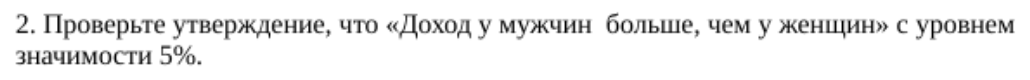

In [215]:
male_income = df[df['Genre'] == 'Male']['Annual Income (k$)']
female_income = df[df['Genre'] == 'Female']['Annual Income (k$)']

male_income_n = len(male_income)
female_income_n = len(female_income)

male_income_mean = np.mean(male_income)
female_income_mean = np.mean(female_income)

male_income_std = np.std(male_income, ddof=1)
female_income_std = np.std(female_income, ddof=1)

# Гипотеза H0 - m1 = m2
# Гипотеза H1 - m1 > m2

# ZТЕСТ (дисперсии известны)
ztest_u_stat = (male_income_mean - female_income_mean) / np.sqrt(male_income_std**2/male_income_n + female_income_std**2/female_income_n)
ztest_p_value = 1 - stats.norm.cdf(ztest_u_stat)

print(f"Статистика U = {ztest_u_stat}\np_value = {ztest_p_value}")
print("По ZТЕСТу отвергаем гипотезу H1 - доход у мужчин больше, чем у женщин\n")

# TТЕСТ (дисперсии неизвестны)
levene_stat, levene_p_value = stats.levene(male_income, female_income)
print(f"Статистика = {levene_stat}\np_value = {levene_p_value}")
print("По тесту Левена принимаем гипотезу H0 - дисперсии равны\n")

std = np.sqrt(((male_income_n - 1) * male_income_std**2 + (female_income_n - 1) * female_income_std**2) / (male_income_n + female_income_n - 2))

ttest_t_stat = (male_income_mean - female_income_mean) / (std * np.sqrt(1/male_income_n + 1/female_income_n))
ttest_p_value = 1 - stats.t.cdf(ttest_t_stat, df=male_income_n + female_income_n - 2)

print(f"Статистика T = {ttest_t_stat}\np_value = {ttest_p_value}")
print("По TТЕСТу отвергаем гипотезу H1 - доход у мужчин больше, чем у женщин")

Статистика U = 0.7927442280257678
p_value = 0.21396342819726444
По ZТЕСТу отвергаем гипотезу H1 - доход у мужчин больше, чем у женщин

Статистика = 0.009382581164628449
p_value = 0.922932592112867
По тесту Левена принимаем гипотезу H0 - дисперсии равны

Статистика T = 0.795022298602198
p_value = 0.21377624699963937
По TТЕСТу отвергаем гипотезу H1 - доход у мужчин больше, чем у женщин


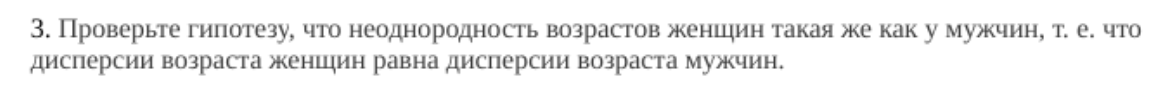

In [216]:
male_age = df[df['Genre'] == 'Male']['Age']
female_age = df[df['Genre'] == 'Female']['Age']

male_age_std = np.std(male_age, ddof=1)
female_age_std = np.std(female_age, ddof=1)

male_age_n = len(male_age)
female_age_n = len(female_age)

# F-тест для дисперсии
print(male_age_std**2, female_age_std**2)

f_stat = male_age_std**2 / female_age_std**2
f_p_value = 2 * (1 - stats.f.cdf(f_stat, dfn=male_age_n-1, dfd=female_age_n-1))

print(f"Статистика F = {f_stat}\np_value = {f_p_value}")
print("По F-тесту отвергаем гипотезу H0 - равенство дисперсий (неоднородность возрастов женщин такая же как у мужчин)")

240.7093782654128 159.87314993564993
Статистика F = 1.5056272949041163
p_value = 0.041995474348862416
По F-тесту отвергаем гипотезу H0 - равенство дисперсий (неоднородность возрастов женщин такая же как у мужчин)


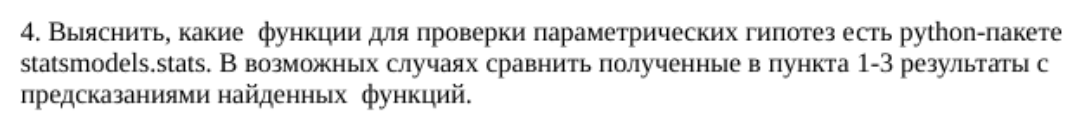

In [217]:
ztest_stat_male, ztest_p_value_male = ws.ztest(male_spending_score, value=m0)
ztest_stat_female, ztest_p_value_female = ws.ztest(female_spending_score, value=m0)

print("statsmodels ZTEST")
print(f"Мужчины: {ztest_stat_male}, {ztest_p_value_male}")
print(f"Женщины: {ztest_stat_female}, {ztest_p_value_female}")
print()

ttest_stat, ttest_p_value, _ = ws.CompareMeans(ws.DescrStatsW(male_income), ws.DescrStatsW(female_income)).ttest_ind(alternative='larger')

print("statsmodels TTEST")
print(ttest_stat, ttest_p_value)

statsmodels ZTEST
Мужчины: -0.5005829391218226, 0.6166646719836593
Женщины: 0.6700400085108483, 0.5028322861359307

statsmodels TTEST
0.795022298602198 0.21377624699963932
